# Assignment 8-9

### Part 1
1. Take your 6A Code (your optimized version, not the base version with Dense layer), and learn how to integrate **gradCAM** with your code. 
> Learn more about gradCAM here - https://www.hackevolve.com/where-cnn-is-looking-grad-cam/
2. As proof of integration, test 4 images (remember the image ids or names) from your network and show the visualization like this:
![image](https://user-images.githubusercontent.com/15984084/64717395-e074ec80-d4e1-11e9-8867-3df9836f5b12.png)

3. This is the first part of the assignment. 

### Part 2
1. Train your 6A model again, but this time add **CutOut**. 
> Use this link for reference - https://github.com/yu4u/cutout-random-erasing
2. Show the same 4 images again with gradCAM's result. 
3. This is the second part of the assignment

### Submit the file as Assignment 9 
Total Assignment Score 600


##Loading and Preprocessing the Data

### Loading the Cifar10 Datset and plotting 10 classes

In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

from keras.preprocessing.image import ImageDataGenerator

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

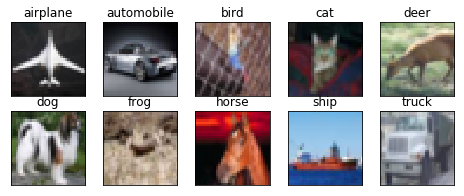

In [75]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

### Defining Functions to Plot Accuracy and Loss Graphs.

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

###**Type Conversion and Scalling:**
1. Convert the input data type to float32.
2. Normalise the input data within the range of 0 and 9.

###**One Hot Encoding of Labels:**
1. Convert the 1D class arrays of output data into 10 dimesional class matrices - basically one hot encoding.

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

##**Model Creation Using Keras**
The following code defines the architecture/model of our neural network in which we will add layers in the network using keras:
1.   **Initializing a sequential model**: Stack layers on top of one another, it also ensures that the input and output sizes of successive layers are compatible. 
2.   **Adding Convolution Layers**: While adding the first convolution layer we need to specify the input size as well. In the next convolution layers we do not need an input size since they will receive the input size from the preceeding layers.
3. **Adding Max Pooling Layers**: We add them to resuce the dimensions of image extracting the maximum out of the (2,2) pool and pass them forward.
4. **Adding Flatten Layer**: When finally we reach the output size of 1X1X10, we flatten the output channel-wise into output of shape 10 (1-dimension).
5. **Adding Softmax Layer**: This layer converts the last layer outuput into probabolity distribution of 10 classes.



### Model From Assignment 6A

**Placing Droupout Layers and Correcting its dropout rate**

Total params: 652,474

Trainable params: 652,474

Non-trainable params: 0

> Adding Dropout after every layer with 0.10 value: **Validation Accuracy=82.77%**

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_8 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_9 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 48)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:88: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:88: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`


Epoch 1/50
390/390 [==============================] - 31s 79ms/step - loss: 1.7673 - acc: 0.3563 - val_loss: 1.4956 - val_acc: 0.4851
Epoch 2/50
390/390 [==============================] - 25s 64ms/step - loss: 1.3721 - acc: 0.5101 - val_loss: 1.2327 - val_acc: 0.5944
Epoch 3/50
390/390 [==============================] - 25s 65ms/step - loss: 1.1717 - acc: 0.5838 - val_loss: 1.0653 - val_acc: 0.6414
Epoch 4/50
390/390 [==============================] - 25s 65ms/step - loss: 1.0548 - acc: 0.6236 - val_loss: 0.9264 - val_acc: 0.6938
Epoch 5/50
390/390 [==============================] - 25s 65ms/step - loss: 0.9659 - acc: 0.6534 - val_loss: 0.7878 - val_acc: 0.7500
Epoch 6/50
390/390 [==============================] - 25s 64ms/step - loss: 0.8839 - acc: 0.6826 - val_loss: 0.7562 - val_acc: 0.7584
Epoch 7/50
390/390 [==============================] - 25s 65ms/step - loss: 0.8285 - acc: 0.7025 - val_loss: 0.6993 - val_acc: 0.7764
Epoch 8/50
390/390 [==============================] - 25s 64ms

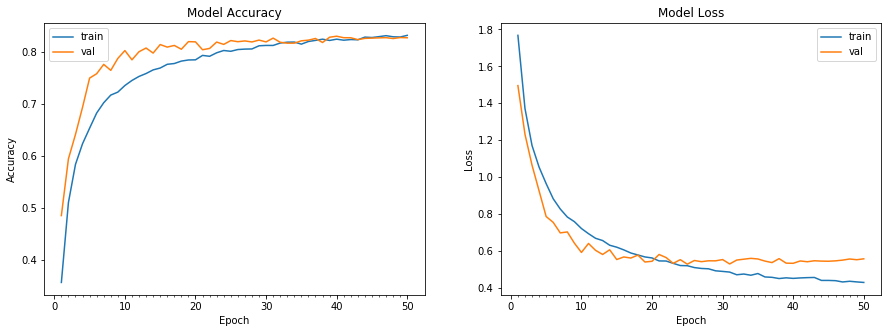

Accuracy on test data is: 82.77


In [80]:
########################################
# Define the model
model = Sequential()
########################################

# All shapes are in the form [height, width, num_channels]

# INPUT SIZE : [32, 32, 3] | OUTPUT SIZE : [32, 32, 48] | GRF_of_input : [1, 1]
model.add(Convolution2D(48, (3, 3), padding='same', input_shape=(32, 32, 3))) # 32
model.add(Activation('relu'))
model.add(Dropout(0.15))


# INPUT SIZE : [32, 32, 48] | OUTPUT SIZE : [30, 30, 48] | GRF_of_input : [3, 3]
model.add(Convolution2D(48, (3, 3))) # 30
model.add(Activation('relu'))
model.add(Dropout(0.15))


########################################

# INPUT SIZE : [30, 30, 48] | OUTPUT SIZE : [15, 15, 48] | GRF_of_input : [5, 5]
model.add(MaxPooling2D(pool_size=(2, 2))) # 15
model.add(Dropout(0.15))
########################################

# The valid means there is no padding around input or feature map, while same means there are some padding around input or feature map, making the output feature map's size same as the input's]
# INPUT SIZE : [15, 15, 48] | OUTPUT SIZE : [15, 15, 96] | GRF_of_input : [7, 7]
model.add(Convolution2D(96, (3, 3), padding='same')) # 15
model.add(Activation('relu'))
model.add(Dropout(0.15))

# INPUT SIZE : [15, 15, 96] | OUTPUT SIZE : [13, 13, 96] | GRF_of_input : [11, 11]
model.add(Convolution2D(96, (3, 3))) # 13
model.add(Activation('relu'))
model.add(Dropout(0.15))
########################################

# INPUT SIZE : [13, 13, 96] | OUTPUT SIZE : [6, 6, 96] | GRF_of_input : [15, 15]
model.add(MaxPooling2D(pool_size=(2, 2))) # 6
model.add(Dropout(0.15))
########################################

# INPUT SIZE : [6, 6, 96] | OUTPUT SIZE : [6, 6, 192] | GRF_of_input : [19, 19]
model.add(Convolution2D(192, (3, 3), padding='same')) # 6
model.add(Activation('relu'))
model.add(Dropout(0.15))

# INPUT SIZE : [6, 6, 192] | OUTPUT SIZE : [4, 4, 192] | GRF_of_input : [27, 27]
model.add(Convolution2D(192, (3, 3))) # 4
model.add(Activation('relu'))
model.add(Dropout(0.15))


########################################
# INPUT SIZE : [4, 4, 192] | OUTPUT SIZE : [2, 2, 192] | GRF_of_input : [35, 35]
model.add(MaxPooling2D(pool_size=(2, 2))) # 2
model.add(Dropout(0.15))
########################################

model.add(Convolution2D(num_classes, (2, 2)))
model.add(Dropout(0.15))

model.add(Flatten())
model.add(Activation('softmax'))

########################################

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Printing out the model summary
model.summary()

########################################
# saving the model to reload model with initial weights while trying out different optimizations
model.save_weights('model.h5')
########################################

########################################################################################################################
model.load_weights('model.h5')
datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)

# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))
model.save_weights('model_afterTraining.h5')

#######################################################################################################################

## GRAD CAM
###Gradient-weighted Class Activation Mapping (Grad-CAM), uses the gradients of any target concept (say logits for ‘dog’ or even a caption), flowing into the final convolutional layer to produce a coarse localization map highlighting the important regions in the image for predicting the concept.

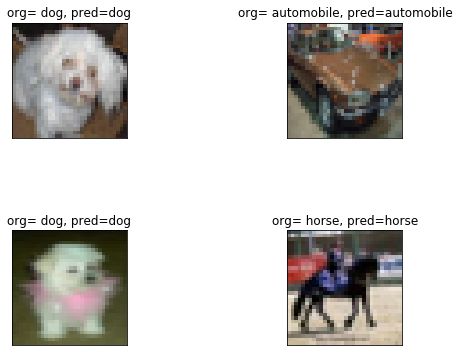

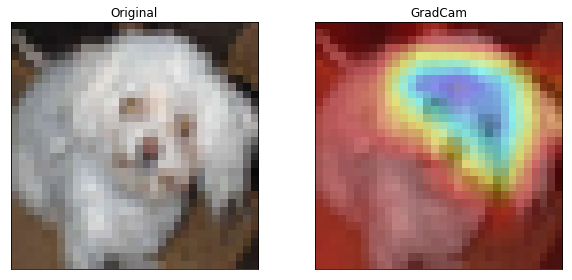

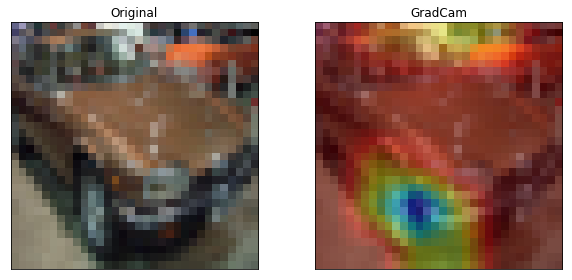

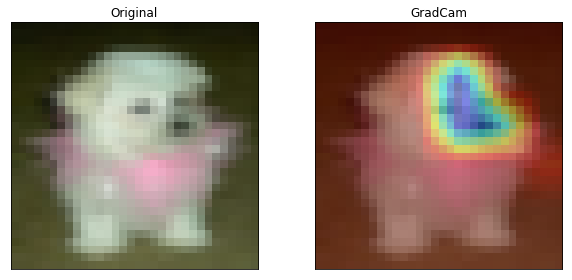

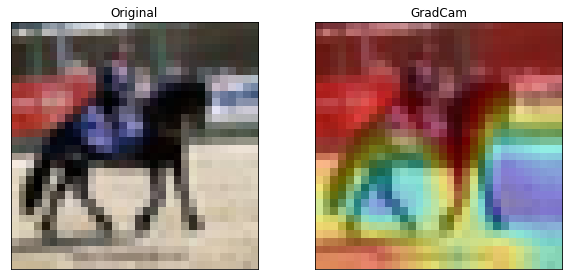

In [53]:
from keras.preprocessing import image
import cv2

########################
(train_features_org, train_labels_org), (test_features_org, test_labels_org) = cifar10.load_data()
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
########################
# Preprocessing
train_features = train_features.astype('float32')/255
test_features = test_features_org.astype('float32')/255
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

########################
model.save_weights('model_afterTraining.h5')
predictions = model.predict(test_features_org[images])
########################

preds = []
fig = plt.figure(figsize=(7, 7))

# Selecting 4 images for the GRAM CAM Operation
images = [1000, 2000, 3000, 5000]
pos = [1, 3, 4, 6]
for i, img_num in enumerate(images):
    ax = fig.add_subplot(2, 3, pos[i], xticks=[], yticks=[])    
    im = test_features_org[img_num]
    preds.append(np.argmax(predictions[i]))
    title = "org= " + class_names[test_labels_org[img_num][0]] + ", pred=" + class_names[preds[i]] 
    ax.set_title(title)
    plt.imshow(im)
plt.show()

########################
# GradCAM Generation
for index, class_idx in enumerate(preds):
  x = test_features[images[index]]
  x = np.expand_dims(x, axis=0)

  class_output = model.output[:, class_idx]
  last_conv_layer = model.get_layer("conv2d_5")

  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([x])
  for i in range(192):
      conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)

  img = test_features_org[images[index]]
  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
  
  fig = plt.figure(figsize=(10, 10))
  ax = fig.add_subplot(2, 2, 1, xticks=[], yticks=[])
  ax.set_title("Original")
  plt.imshow(img)

  ax = fig.add_subplot(2, 2, 2, xticks=[], yticks=[])
  ax.set_title("GradCam")
  plt.imshow(superimposed_img)
########################

## After Cutout
###Cutout is a simple regularization method for convolutional neural networks which consists of masking out random sections of input images during training. This technique simulates occluded examples and encourages the model to take more minor features into consideration when making decisions, rather than relying on the presence of a few major features.


---

### After Using CUTOUT: Validation Accuracy = 82.93%

Result after 50 epochs:

| loss: 0.6340 | acc: 0.7659 | val_loss: 0.5072 | **val_acc: 0.8293** |



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/50
390/390 [==============================] - 30s 76ms/step - loss: 1.8688 - acc: 0.3100 - val_loss: 1.5520 - val_acc: 0.4989
Epoch 2/50
390/390 [==============================] - 25s 64ms/step - loss: 1.5098 - acc: 0.4556 - val_loss: 1.2285 - val_acc: 0.5923
Epoch 3/50
390/390 [==============================] - 25s 64ms/step - loss: 1.3196 - acc: 0.5262 - val_loss: 1.0732 - val_acc: 0.6503
Epoch 4/50
390/390 [==============================] - 25s 65ms/step - loss: 1.1966 - acc: 0.5707 - val_loss: 0.9813 - val_acc: 0.6712
Epoch 5/50
390/390 [==============================] - 25s 65ms/step - loss: 1.1086 - acc: 0.6042 - val_loss: 0.8699 - val_acc: 0.7125
Epoch 6/50
390/390 [==============================] - 25s 64ms/step - loss: 1.0422 - acc: 0.6261 - val_loss: 0.7746 - val_acc: 0.7476
Epoch 7/50
390/390 [==============================] - 25s 65ms/step - loss: 0.9942 - acc: 0.6453 - val

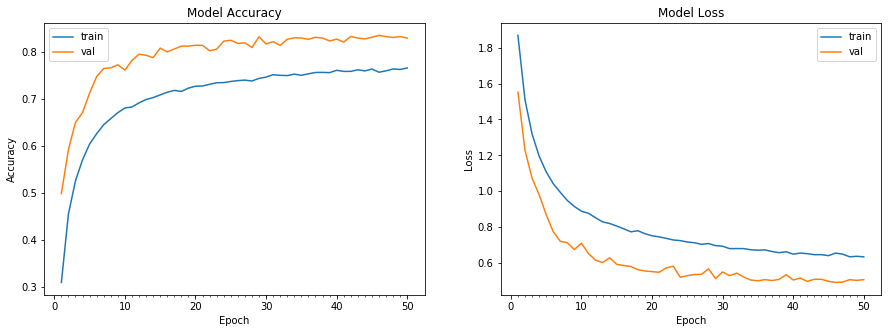

Accuracy on test data is: 82.93


In [54]:
# Defining the function to apply CUTOUT on the input images
def get_random_eraser(p=0.5, s_l=0.02, s_h=0.4, r_1=0.3, r_2=1/0.3, v_l=0, v_h=255, pixel_level=False):
    def eraser(input_img):
        img_h, img_w, img_c = input_img.shape
        p_1 = np.random.rand()

        if p_1 > p:
            return input_img

        while True:
            s = np.random.uniform(s_l, s_h) * img_h * img_w
            r = np.random.uniform(r_1, r_2)
            w = int(np.sqrt(s / r))
            h = int(np.sqrt(s * r))
            left = np.random.randint(0, img_w)
            top = np.random.randint(0, img_h)

            if left + w <= img_w and top + h <= img_h:
                break

        if pixel_level:
            c = np.random.uniform(v_l, v_h, (h, w, img_c))
        else:
            c = np.random.uniform(v_l, v_h)

        input_img[top:top + h, left:left + w, :] = c

        return input_img

    return eraser
##############################
# Initializing the model
model.load_weights('model.h5')
datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False, 
                             preprocessing_function=get_random_eraser(v_l=0, v_h=1))

# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))
model.save_weights('model_withCutout_afterTraining.h5')

#######################################################################################################################

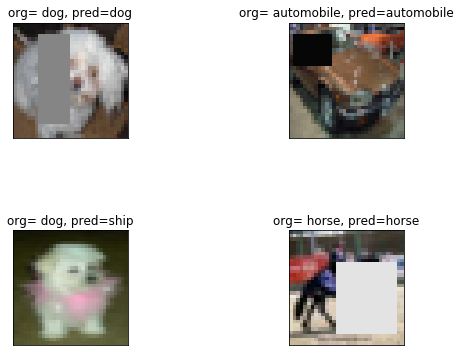

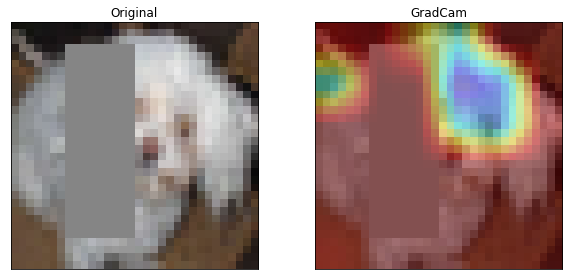

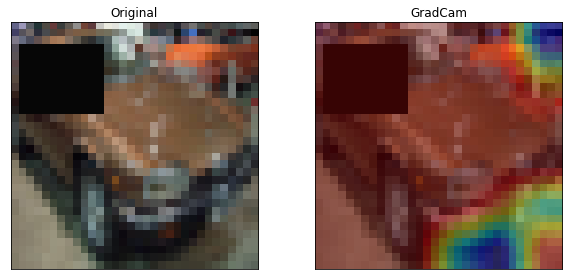

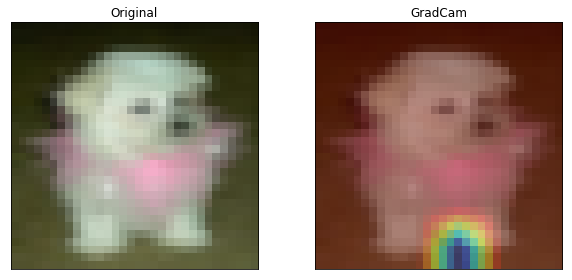

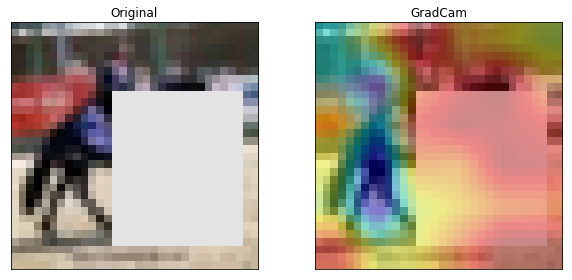

In [66]:
from keras.preprocessing import image
import cv2

# model.load_weights('model_withCutout_afterTraining.h5')
########################
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

# Selecting 4 images for the GRAM CAM Operation
images = [1000, 2000, 3000, 5000]
########################
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
(train_features_org, train_labels_org), (test_features_org, test_labels_org) = cifar10.load_data()
# Preprocess
train_features = train_features.astype('float32')/255
test_features = test_features_org.astype('float32')/255
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

predictions = model.predict(test_features_org[images])
########################
eraser = get_random_eraser()

preds = []
fig = plt.figure(figsize=(7, 7))

images = [1000, 2000, 3000, 5000]
pos = [1, 3, 4, 6]
for i, img_num in enumerate(images):
    ax = fig.add_subplot(2, 3, pos[i], xticks=[], yticks=[])    
    im = test_features_org[img_num]
    im = eraser(im)
    preds.append(np.argmax(predictions[i]))
    title = "org= " + class_names[test_labels_org[img_num][0]] + ", pred=" + class_names[preds[i]] 
    ax.set_title(title)
    plt.imshow(im)

plt.show()

########################

for index, class_idx in enumerate(preds):
  x = test_features[images[index]] 
  x = eraser(x)
  x = np.expand_dims(x, axis=0)

  class_output = model.output[:, class_idx]
  last_conv_layer = model.get_layer("conv2d_5")

  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([x])
  for i in range(192):
      conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)

  img = test_features_org[images[index]]
  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
  
  fig = plt.figure(figsize=(10, 10))
  ax = fig.add_subplot(2, 2, 1, xticks=[], yticks=[])
  ax.set_title("Original")
  plt.imshow(img)

  ax = fig.add_subplot(2, 2, 2, xticks=[], yticks=[])
  ax.set_title("GradCam")
  plt.imshow(superimposed_img)